In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Setting the parameters of the graph for suitable plotting

plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

In [9]:
# lets make date as index since we have unique dates

fx = pd.read_csv('BOE-XUDLERD.csv', parse_dates = ['Date'], index_col='Date')
fx = fx[::-1]
fx.head(3)

,Value
Date,
1975-01-02,0.7633
1975-01-03,0.7585
1975-01-06,0.7524


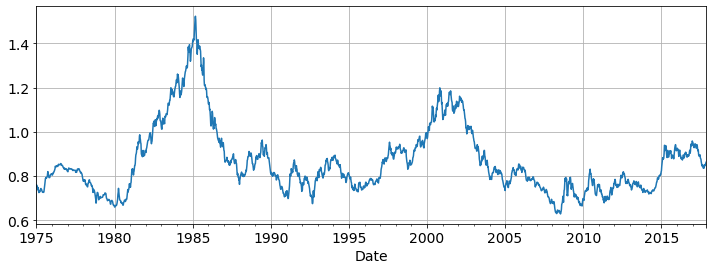

In [10]:
# finding the mean of weekly frequency 

fxw  = fx.Value.resample('W').mean()
fxw.plot()
plt.show()

In [11]:
fxw.head()

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
Freq: W-SUN, Name: Value, dtype: float64

In [14]:
raw_sequence=fxw.tolist()

In [15]:
len(raw_sequence)

2237

In [18]:
# spliting data in ration 80,20 train and test

raw_sequence_train=raw_sequence[:1790]
raw_sequence_test=raw_sequence[1790:]

In [26]:
# univariate data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = raw_sequence_train
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[0.7609  0.75346 0.75546] 0.74388
[0.75346 0.75546 0.74388] 0.73902
[0.75546 0.74388 0.73902] 0.7490600000000001
[0.74388 0.73902 0.74906] 0.74142
[0.73902 0.74906 0.74142] 0.73538
[0.74906 0.74142 0.73538] 0.7257800000000001
[0.74142 0.73538 0.72578] 0.7266800000000001
[0.73538 0.72578 0.72668] 0.73212
[0.72578 0.72668 0.73212] 0.7286800000000001
[0.72668 0.73212 0.72868] 0.73475
[0.73212 0.72868 0.73475] 0.737675
[0.72868  0.73475  0.737675] 0.74296
[0.73475  0.737675 0.74296 ] 0.74428
[0.737675 0.74296  0.74428 ] 0.74106
[0.74296 0.74428 0.74106] 0.7406200000000001
[0.74428 0.74106 0.74062] 0.7346199999999999
[0.74106 0.74062 0.73462] 0.73122
[0.74062 0.73462 0.73122] 0.72814
[0.73462 0.73122 0.72814] 0.7268749999999999
[0.73122  0.72814  0.726875] 0.72782
[0.72814  0.726875 0.72782 ] 0.72736
[0.726875 0.72782  0.72736 ] 0.7266600000000001
[0.72782 0.72736 0.72666] 0.7298199999999999
[0.72736 0.72666 0.72982] 0.7405
[0.72666 0.72982 0.7405 ] 0.74948
[0.72982 0.7405  0.74948] 0.764
[

[0.71486 0.72422 0.7397 ] 0.72822
[0.72422 0.7397  0.72822] 0.73644
[0.7397  0.72822 0.73644] 0.7387400000000001
[0.72822 0.73644 0.73874] 0.7467599999999999
[0.73644 0.73874 0.74676] 0.7641199999999999
[0.73874 0.74676 0.76412] 0.7661
[0.74676 0.76412 0.7661 ] 0.7500333333333332
[0.76412    0.7661     0.75003333] 0.7541
[0.7661     0.75003333 0.7541    ] 0.7500399999999999
[0.75003333 0.7541     0.75004   ] 0.7676200000000001
[0.7541  0.75004 0.76762] 0.77186
[0.75004 0.76762 0.77186] 0.7971600000000001
[0.76762 0.77186 0.79716] 0.81716
[0.77186 0.79716 0.81716] 0.8287599999999999
[0.79716 0.81716 0.82876] 0.83308
[0.81716 0.82876 0.83308] 0.81904
[0.82876 0.83308 0.81904] 0.83216
[0.83308 0.81904 0.83216] 0.8207799999999998
[0.81904 0.83216 0.82078] 0.80528
[0.83216 0.82078 0.80528] 0.81792
[0.82078 0.80528 0.81792] 0.8228
[0.80528 0.81792 0.8228 ] 0.8345600000000001
[0.81792 0.8228  0.83456] 0.8477
[0.8228  0.83456 0.8477 ] 0.848225
[0.83456  0.8477   0.848225] 0.8571199999999999
[0

[1.28814 1.26466 1.25602] 1.266175
[1.26466  1.25602  1.266175] 1.3005799999999998
[1.25602  1.266175 1.30058 ] 1.3339199999999998
[1.266175 1.30058  1.33392 ] 1.31252
[1.30058 1.33392 1.31252] 1.2318
[1.33392 1.31252 1.2318 ] 1.2093399999999999
[1.31252 1.2318  1.20934] 1.2086999999999999
[1.2318  1.20934 1.2087 ] 1.21242
[1.20934 1.2087  1.21242] 1.20588
[1.2087  1.21242 1.20588] 1.1972200000000002
[1.21242 1.20588 1.19722] 1.19096
[1.20588 1.19722 1.19096] 1.1960799999999998
[1.19722 1.19096 1.19608] 1.18686
[1.19096 1.19608 1.18686] 1.16136
[1.19608 1.18686 1.16136] 1.1550799999999999
[1.18686 1.16136 1.15508] 1.15892
[1.16136 1.15508 1.15892] 1.1545
[1.15508 1.15892 1.1545 ] 1.1462666666666665
[1.15892    1.1545     1.14626667] 1.12825
[1.1545     1.14626667 1.12825   ] 1.12412
[1.14626667 1.12825    1.12412   ] 1.1331
[1.12825 1.12412 1.1331 ] 1.12422
[1.12412 1.1331  1.12422] 1.09978
[1.1331  1.12422 1.09978] 1.1024399999999999
[1.12422 1.09978 1.10244] 1.0877
[1.09978 1.10244 1

[0.9069  0.89826 0.88954] 0.9071199999999999
[0.89826 0.88954 0.90712] 0.92674
[0.88954 0.90712 0.92674] 0.9289399999999999
[0.90712 0.92674 0.92894] 0.926925
[0.92674  0.92894  0.926925] 0.9408
[0.92894  0.926925 0.9408  ] 0.9422
[0.926925 0.9408   0.9422  ] 0.92594
[0.9408  0.9422  0.92594] 0.89894
[0.9422  0.92594 0.89894] 0.89814
[0.92594 0.89894 0.89814] 0.90672
[0.89894 0.89814 0.90672] 0.8867799999999999
[0.89814 0.90672 0.88678] 0.8819199999999998
[0.90672 0.88678 0.88192] 0.8798999999999999
[0.88678 0.88192 0.8799 ] 0.883
[0.88192 0.8799  0.883  ] 0.88304
[0.8799  0.883   0.88304] 0.8718199999999999
[0.883   0.88304 0.87182] 0.85732
[0.88304 0.87182 0.85732] 0.8516400000000001
[0.87182 0.85732 0.85164] 0.8371600000000001
[0.85732 0.85164 0.83716] 0.82994
[0.85164 0.83716 0.82994] 0.8143333333333334
[0.83716    0.82994    0.81433333] 0.818275
[0.82994    0.81433333 0.818275  ] 0.8071800000000001
[0.81433333 0.818275   0.80718   ] 0.81538
[0.818275 0.80718  0.81538 ] 0.8145
[0.8

[0.79418 0.79564 0.79536] 0.79492
[0.79564 0.79536 0.79492] 0.7922399999999999
[0.79536 0.79492 0.79224] 0.77292
[0.79492 0.79224 0.77292] 0.77142
[0.79224 0.77292 0.77142] 0.77722
[0.77292 0.77142 0.77722] 0.78574
[0.77142 0.77722 0.78574] 0.79846
[0.77722 0.78574 0.79846] 0.80342
[0.78574 0.79846 0.80342] 0.8093
[0.79846 0.80342 0.8093 ] 0.8127800000000001
[0.80342 0.8093  0.81278] 0.8129799999999999
[0.8093  0.81278 0.81298] 0.81538
[0.81278 0.81298 0.81538] 0.8074
[0.81298 0.81538 0.8074 ] 0.806325
[0.81538  0.8074   0.806325] 0.7997799999999999
[0.8074   0.806325 0.79978 ] 0.7935200000000001
[0.806325 0.79978  0.79352 ] 0.7872199999999999
[0.79978 0.79352 0.78722] 0.7905800000000001
[0.79352 0.78722 0.79058] 0.79568
[0.78722 0.79058 0.79568] 0.7841199999999999
[0.79058 0.79568 0.78412] 0.77336
[0.79568 0.78412 0.77336] 0.7698
[0.78412 0.77336 0.7698 ] 0.74758
[0.77336 0.7698  0.74758] 0.75032
[0.7698  0.74758 0.75032] 0.75492
[0.74758 0.75032 0.75492] 0.7465600000000001
[0.75032 0

[1.033   1.03224 1.04082] 1.04298
[1.03224 1.04082 1.04298] 1.0435
[1.04082 1.04298 1.0435 ] 1.0571
[1.04298 1.0435  1.0571 ] 1.088975
[1.0435   1.0571   1.088975] 1.1160249999999998
[1.0571   1.088975 1.116025] 1.1069
[1.088975 1.116025 1.1069  ] 1.1115
[1.116025 1.1069   1.1115  ] 1.0984200000000002
[1.1069  1.1115  1.09842] 1.07095
[1.1115  1.09842 1.07095] 1.04958
[1.09842 1.07095 1.04958] 1.0444799999999999
[1.07095 1.04958 1.04448] 1.0554200000000002
[1.04958 1.04448 1.05542] 1.0553599999999999
[1.04448 1.05542 1.05536] 1.0497599999999998
[1.05542 1.05536 1.04976] 1.0594
[1.05536 1.04976 1.0594 ] 1.0757400000000001
[1.04976 1.0594  1.07574] 1.06772
[1.0594  1.07574 1.06772] 1.0919400000000001
[1.07574 1.06772 1.09194] 1.10642
[1.06772 1.09194 1.10642] 1.0983
[1.09194 1.10642 1.0983 ] 1.11026
[1.10642 1.0983  1.11026] 1.11785
[1.0983  1.11026 1.11785] 1.1357199999999998
[1.11026 1.11785 1.13572] 1.15994
[1.11785 1.13572 1.15994] 1.16602
[1.13572 1.15994 1.16602] 1.1364200000000002

[0.80986 0.81206 0.80864] 0.79516
[0.81206 0.80864 0.79516] 0.78398
[0.80864 0.79516 0.78398] 0.78086
[0.79516 0.78398 0.78086] 0.7739199999999999
[0.78398 0.78086 0.77392] 0.7693599999999999
[0.78086 0.77392 0.76936] 0.76004
[0.77392 0.76936 0.76004] 0.7515599999999999
[0.76936 0.76004 0.75156] 0.75074
[0.76004 0.75156 0.75074] 0.7514200000000001
[0.75156 0.75074 0.75142] 0.74414
[0.75074 0.75142 0.74414] 0.7352
[0.75142 0.74414 0.7352 ] 0.7577499999999999
[0.74414 0.7352  0.75775] 0.75956
[0.7352  0.75775 0.75956] 0.7681600000000001
[0.75775 0.75956 0.76816] 0.76776
[0.75956 0.76816 0.76776] 0.76952
[0.76816 0.76776 0.76952] 0.77928
[0.76776 0.76952 0.77928] 0.7686599999999999
[0.76952 0.77928 0.76866] 0.75896
[0.77928 0.76866 0.75896] 0.75824
[0.76866 0.75896 0.75824] 0.7489199999999999
[0.75896 0.75824 0.74892] 0.7487000000000001
[0.75824 0.74892 0.7487 ] 0.76385
[0.74892 0.7487  0.76385] 0.771625
[0.7487   0.76385  0.771625] 0.7780199999999999
[0.76385  0.771625 0.77802 ] 0.77542


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [24]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
x = X.reshape((X.shape[0], X.shape[1], n_features))


In [25]:
# Vanilla LSTM Model
# define model 
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
1787/1787 [==============================] - 1s 420us/sample - loss: 0.4780
Epoch 2/200
1787/1787 [==============================] - 0s 77us/sample - loss: 0.0263
Epoch 3/200
1787/1787 [==============================] - 0s 94us/sample - loss: 0.0013
Epoch 4/200
1787/1787 [==============================] - 0s 86us/sample - loss: 0.0012
Epoch 5/200
1787/1787 [==============================] - 0s 75us/sample - loss: 0.0010
Epoch 6/200
1787/1787 [==============================] - 0s 85us/sample - loss: 9.1073e-04
Epoch 7/200
1787/1787 [==============================] - 0s 76us/sample - loss: 7.9685e-04
Epoch 8/200
1787/1787 [==============================] - 0s 80us/sample - loss: 7.0298e-04
Epoch 9/200
1787/1787 [==============================] - 0s 77us/sample - loss: 6.1714e-04
Epoch 10/200
1787/1787 [==============================] - 0s 84us/sample - loss: 5.4743e-04
Epoch 11/200
1787/1787 [==============================] - 0s 79us/sample - loss: 4.9785e-04
Epoch 12/200
178

1787/1787 [==============================] - 0s 70us/sample - loss: 3.2353e-04
Epoch 91/200
1787/1787 [==============================] - 0s 70us/sample - loss: 3.2851e-04
Epoch 92/200
1787/1787 [==============================] - 0s 69us/sample - loss: 3.0028e-04
Epoch 93/200
1787/1787 [==============================] - 0s 73us/sample - loss: 3.0899e-04
Epoch 94/200
1787/1787 [==============================] - 0s 69us/sample - loss: 3.0244e-04
Epoch 95/200
1787/1787 [==============================] - 0s 69us/sample - loss: 3.0014e-04
Epoch 96/200
1787/1787 [==============================] - 0s 78us/sample - loss: 2.9252e-04
Epoch 97/200
1787/1787 [==============================] - 0s 70us/sample - loss: 3.0024e-04
Epoch 98/200
1787/1787 [==============================] - 0s 84us/sample - loss: 2.8785e-04
Epoch 99/200
1787/1787 [==============================] - 0s 82us/sample - loss: 2.9433e-04
Epoch 100/200
1787/1787 [==============================] - 0s 104us/sample - loss: 2.7998e-04

1787/1787 [==============================] - 0s 103us/sample - loss: 2.1719e-04
Epoch 178/200
1787/1787 [==============================] - 0s 105us/sample - loss: 2.2452e-04
Epoch 179/200
1787/1787 [==============================] - 0s 116us/sample - loss: 2.2219e-04
Epoch 180/200
1787/1787 [==============================] - 0s 93us/sample - loss: 2.1661e-04
Epoch 181/200
1787/1787 [==============================] - 0s 91us/sample - loss: 2.2514e-04
Epoch 182/200
1787/1787 [==============================] - 0s 89us/sample - loss: 2.4555e-04
Epoch 183/200
1787/1787 [==============================] - 0s 87us/sample - loss: 2.2512e-04
Epoch 184/200
1787/1787 [==============================] - 0s 89us/sample - loss: 2.3284e-04
Epoch 185/200
1787/1787 [==============================] - 0s 107us/sample - loss: 2.2853e-04
Epoch 186/200
1787/1787 [==============================] - 0s 112us/sample - loss: 2.3125e-04
Epoch 187/200
1787/1787 [==============================] - 0s 107us/sample - lo

In [35]:
# Demonstrate prediction for next 4 weeks ie 1 month

x_input=array(X.tolist()[-1])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<4):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[0.7514587]
1 day input [0.75148   0.753125  0.7514587]
1 day output [[0.7535214]]
2 day input [0.753125   0.7514587  0.75352138]
2 day output [[0.7541394]]
3 day input [0.7514587 0.7535214 0.7541394]
3 day output [[0.7547679]]
[0.7514587, 0.7535214, 0.7541394, 0.7547679]


In [36]:
# Now to test the output, lets prdict the next set of values and compare

In [37]:
len(raw_sequence_test)

447

In [40]:
x_input=array(X.tolist()[-1])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<len(raw_sequence_test)):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[0.7514587, 0.7535214, 0.7541394, 0.7547679, 0.7556652, 0.75638217, 0.75711954, 0.7578583, 0.75856787, 0.7592701, 0.7599596, 0.7606355, 0.76129997, 0.7619526, 0.7625935, 0.7632233, 0.7638422, 0.7644504, 0.765048, 0.7656357, 0.7662133, 0.7667813, 0.7673396, 0.7678888, 0.76842886, 0.7689601, 0.7694827, 0.7699969, 0.77050275, 0.77100044, 0.7714903, 0.77197236, 0.7724469, 0.77291393, 0.7733737, 0.7738265, 0.77427226, 0.77471125, 0.77514356, 0.7755694, 0.77598876, 0.7764018, 0.77680886, 0.7772097, 0.77760494, 0.7779941, 0.77837765, 0.7787556, 0.77912825, 0.77949554, 0.77985746, 0.78021413, 0.7805658, 0.78091246, 0.7812542, 0.78159106, 0.78192323, 0.7822508, 0.7825737, 0.7828922, 0.78320634, 0.78351617, 0.78382176, 0.78412324, 0.78442067, 0.784714, 0.78500336, 0.785289, 0.7855707, 0.7858487, 0.78612304, 0.78639376, 0.7866609, 0.7869245, 0.78718483, 0.7874418, 0.7876953, 0.7879455, 0.78819263, 0.78843653, 0.78867733, 0.7889151, 0.7891499, 0.7893817, 0.78961056, 0.7898366, 0.79005986, 0.790280

In [41]:
len(lst_output)

447

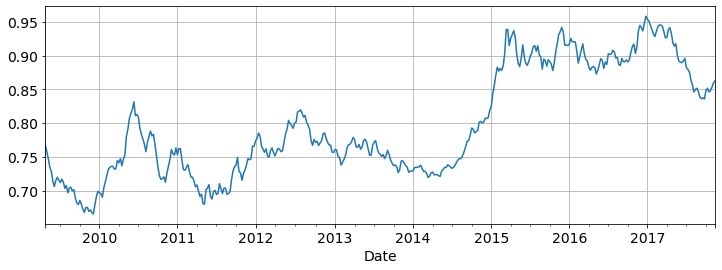

In [57]:
fxw[1790:].plot()
plt.show()

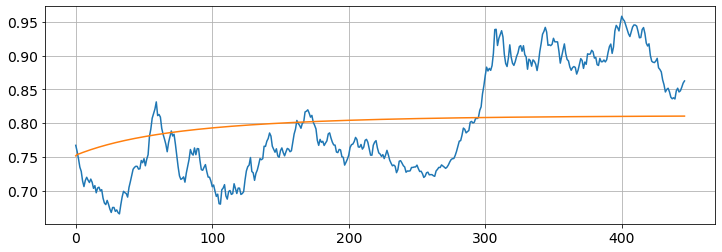

In [61]:

plt.plot(raw_sequence_test)
plt.plot(lst_output)

In [62]:
# lets try using a stacked LSTM
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
1787/1787 [==============================] - 5s 3ms/sample - loss: 0.4006
Epoch 2/200
1787/1787 [==============================] - 0s 133us/sample - loss: 0.0045
Epoch 3/200
1787/1787 [==============================] - 0s 131us/sample - loss: 6.8492e-04
Epoch 4/200
1787/1787 [==============================] - 0s 123us/sample - loss: 5.8623e-04
Epoch 5/200
1787/1787 [==============================] - 0s 124us/sample - loss: 5.4381e-04
Epoch 6/200
1787/1787 [==============================] - 0s 127us/sample - loss: 5.2198e-04
Epoch 7/200
1787/1787 [==============================] - 0s 125us/sample - loss: 5.0749e-04
Epoch 8/200
1787/1787 [==============================] - 0s 125us/sample - loss: 5.0747e-04
Epoch 9/200
1787/1787 [==============================] - 0s 117us/sample - loss: 5.1077e-04
Epoch 10/200
1787/1787 [==============================] - 0s 126us/sample - loss: 5.1888e-04
Epoch 11/200
1787/1787 [==============================] - 0s 128us/sample - loss: 5.0881e

1787/1787 [==============================] - 0s 136us/sample - loss: 3.8805e-04
Epoch 90/200
1787/1787 [==============================] - 0s 132us/sample - loss: 4.0494e-04
Epoch 91/200
1787/1787 [==============================] - 0s 131us/sample - loss: 3.7439e-04
Epoch 92/200
1787/1787 [==============================] - 0s 127us/sample - loss: 3.7203e-04
Epoch 93/200
1787/1787 [==============================] - 0s 128us/sample - loss: 3.6819e-04
Epoch 94/200
1787/1787 [==============================] - 0s 135us/sample - loss: 3.5717e-04
Epoch 95/200
1787/1787 [==============================] - 0s 133us/sample - loss: 3.5764e-04
Epoch 96/200
1787/1787 [==============================] - 0s 132us/sample - loss: 3.6489e-04
Epoch 97/200
1787/1787 [==============================] - 0s 128us/sample - loss: 4.0178e-04
Epoch 98/200
1787/1787 [==============================] - 0s 133us/sample - loss: 3.5159e-04
Epoch 99/200
1787/1787 [==============================] - 0s 134us/sample - loss: 4

1787/1787 [==============================] - 0s 180us/sample - loss: 2.9596e-04
Epoch 177/200
1787/1787 [==============================] - 0s 177us/sample - loss: 2.8550e-04
Epoch 178/200
1787/1787 [==============================] - 0s 161us/sample - loss: 3.1549e-04
Epoch 179/200
1787/1787 [==============================] - 0s 166us/sample - loss: 2.7917e-04
Epoch 180/200
1787/1787 [==============================] - 0s 193us/sample - loss: 2.8066e-04
Epoch 181/200
1787/1787 [==============================] - 0s 180us/sample - loss: 3.0710e-04
Epoch 182/200
1787/1787 [==============================] - 0s 196us/sample - loss: 3.0675e-04
Epoch 183/200
1787/1787 [==============================] - 0s 200us/sample - loss: 2.8223e-04
Epoch 184/200
1787/1787 [==============================] - 0s 178us/sample - loss: 2.7603e-04
Epoch 185/200
1787/1787 [==============================] - 0s 159us/sample - loss: 2.7692e-04
Epoch 186/200
1787/1787 [==============================] - 0s 171us/sample

In [63]:
x_input=array(X.tolist()[-1])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<len(raw_sequence_test)):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[0.75775784, 0.76344997, 0.7673067, 0.7720242, 0.77675575, 0.7811399, 0.7857291, 0.7902708, 0.7947476, 0.7992634, 0.8037549, 0.8082322, 0.81271285, 0.81718373, 0.82165015, 0.8261154, 0.83057785, 0.8350397, 0.83950233, 0.8439663, 0.8484331, 0.8529035, 0.8573789, 0.8618601, 0.86634827, 0.87084466, 0.87534994, 0.8798654, 0.88439196, 0.8889309, 0.8934828, 0.8980493, 0.90263075, 0.9072286, 0.9118441, 0.9164776, 0.92113066, 0.9258041, 0.93049896, 0.9352163, 0.9399574, 0.9447228, 0.94951373, 0.95433146, 0.9591769, 0.96405095, 0.9689547, 0.97388935, 0.9788559, 0.98385525, 0.9888888, 0.9939327, 0.998992, 1.0040716, 1.0091664, 1.0142782, 1.0194073, 1.0245528, 1.029715, 1.0348936, 1.0400884, 1.0452992, 1.0505258, 1.0557674, 1.0610241, 1.0662955, 1.0715809, 1.0768799, 1.082192, 1.0875164, 1.0928528, 1.0982002, 1.1035581, 1.1089258, 1.1143022, 1.1196865, 1.125078, 1.1304753, 1.1358778, 1.1412845, 1.146694, 1.1521051, 1.157517, 1.1629279, 1.1683369, 1.1737424, 1.1791433, 1.184538, 1.189925, 1.195302

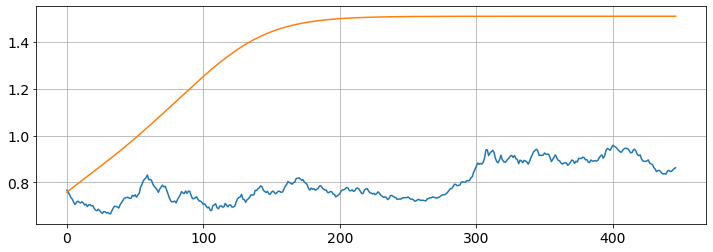

In [64]:
plt.plot(raw_sequence_test)
plt.plot(lst_output)

In [66]:
from tensorflow.keras.layers import Bidirectional

# Tring out with Bi Directional LSTM
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(x, y, epochs=200, verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/200
1787/1787 [==============================] - 2s 1ms/sample - loss: 0.3130
Epoch 2/200
1787/1787 [==============================] - 0s 141us/sample - loss: 0.0022
Epoch 3/200
1787/1787 [==============================] - 0s 125us/sample - loss: 9.6494e-04
Epoch 4/200
1787/1787 [==============================] - 0s 121us/sample - loss: 8.3648e-04
Epoch 5/200
1787/1787 [==============================] - 0s 111us/sample - loss: 7.1254e-04
Epoch 6/200
1787/1787 [==============================] - 0s 112us/sample - loss: 6.1195e-04
Epoch 7/200
1787/1787 [==============================] - 0s 119us/sample - loss: 5.2624e-04
Epoch 8/200


1787/1787 [==============================] - 0s 118us/sample - loss: 2.7254e-04
Epoch 78/200
1787/1787 [==============================] - 0s 115us/sample - loss: 2.6063e-04
Epoch 79/200
1787/1787 [==============================] - 0s 118us/sample - loss: 2.4893e-04
Epoch 80/200
1787/1787 [==============================] - 0s 129us/sample - loss: 2.4755e-04
Epoch 81/200
1787/1787 [==============================] - 0s 129us/sample - loss: 2.5054e-04
Epoch 82/200
1787/1787 [==============================] - 0s 107us/sample - loss: 2.5508e-04
Epoch 83/200
1787/1787 [==============================] - 0s 108us/sample - loss: 2.4449e-04
Epoch 84/200
1787/1787 [==============================] - 0s 134us/sample - loss: 2.4502e-04
Epoch 85/200
1787/1787 [==============================] - 0s 157us/sample - loss: 2.6044e-04
Epoch 86/200
1787/1787 [==============================] - 0s 148us/sample - loss: 2.4546e-04
Epoch 87/200
1787/1787 [==============================] - 0s 109us/sample - loss: 2

1787/1787 [==============================] - 0s 143us/sample - loss: 2.1264e-04
Epoch 165/200
1787/1787 [==============================] - 0s 135us/sample - loss: 1.8483e-04
Epoch 166/200
1787/1787 [==============================] - 0s 138us/sample - loss: 1.8608e-04
Epoch 167/200
1787/1787 [==============================] - 0s 138us/sample - loss: 2.0126e-04
Epoch 168/200
1787/1787 [==============================] - 0s 150us/sample - loss: 1.8661e-04
Epoch 169/200
1787/1787 [==============================] - 0s 175us/sample - loss: 1.8424e-04
Epoch 170/200
1787/1787 [==============================] - 0s 202us/sample - loss: 1.9389e-04
Epoch 171/200
1787/1787 [==============================] - 0s 141us/sample - loss: 1.8170e-04
Epoch 172/200
1787/1787 [==============================] - 0s 140us/sample - loss: 1.8226e-04
Epoch 173/200
1787/1787 [==============================] - 0s 141us/sample - loss: 1.7770e-04
Epoch 174/200
1787/1787 [==============================] - 0s 142us/sample

In [67]:
x_input=array(X.tolist()[-1])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<len(raw_sequence_test)):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[0.7508235, 0.7494824, 0.7476897, 0.7461585, 0.7445791, 0.7430891, 0.74162626, 0.740217, 0.7388481, 0.73752415, 0.7362417, 0.73500097, 0.7338002, 0.73263896, 0.7315159, 0.73043036, 0.7293812, 0.72836757, 0.72738826, 0.7264427, 0.72552943, 0.724648, 0.72379744, 0.72297657, 0.72218466, 0.72142076, 0.72068405, 0.7199731, 0.71928704, 0.7186253, 0.71798694, 0.71737134, 0.71677756, 0.71620524, 0.7156534, 0.7151215, 0.71460867, 0.71411467, 0.71363866, 0.71318007, 0.7127383, 0.7123127, 0.71190286, 0.71150815, 0.71110463, 0.71070087, 0.7102939, 0.7098849, 0.7094734, 0.7090596, 0.70864356, 0.70822525, 0.7078047, 0.7073821, 0.7069571, 0.7065301, 0.7061008, 0.70566976, 0.70523643, 0.7048013, 0.70436394, 0.7039248, 0.7034837, 0.70304084, 0.70259607, 0.7021496, 0.7017014, 0.7012515, 0.70079994, 0.7003466, 0.6998919, 0.6994357, 0.69897795, 0.6985189, 0.69805825, 0.69759655, 0.6971334, 0.6966691, 0.6962035, 0.69573677, 0.69526887, 0.6948, 0.6943301, 0.69385934, 0.6933876, 0.69291496, 0.6924417, 0.6919

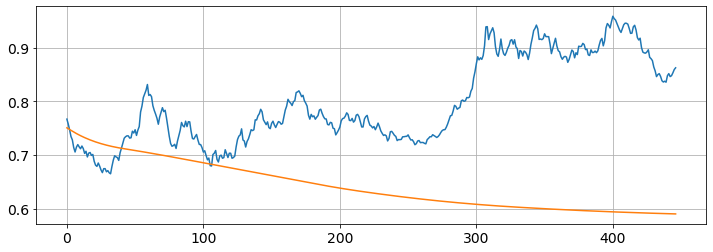

In [68]:
plt.plot(raw_sequence_test)
plt.plot(lst_output)